In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import japanize_matplotlib

import time

In [2]:
def compare_processing_time(n_data, n_cols):
    
    a = np.random.randn(n_data, n_cols) # 正規分布
    b = np.random.randn(n_data, n_cols) # 正規分布
    c = np.random.randint(low=0, high=10, size=(n_data, n_cols))
    
    # DataFame化
    cols = ['col_{}'.format(k) for k in range(0, n_cols)]

    # 処理時間比較用
    elt = []
    
    # (a) 列方向にループ
    df_a = pd.DataFrame(a, columns=cols)
    df_b = pd.DataFrame(b, columns=cols)
    df_c = pd.DataFrame(c, columns=cols)

    start = time.time()
    for _col in cols:
        df_a[_col] = (df_a[_col] + df_b[_col]) / df_c[_col]

    et = time.time() - start
    elt.append(et)
#    print('(a)')
#    print(df_a.head())
    
    # (b) DataFrameどうしで一括計算
    df_a = pd.DataFrame(a, columns=cols)
    df_b = pd.DataFrame(b, columns=cols)
    df_c = pd.DataFrame(c, columns=cols)

    start = time.time()
    df_d = (df_a + df_b) / df_c

    et = time.time() - start
    elt.append(et)
    
    return elt

In [3]:
n_data_list =[10, 100, 1_000, 2_000, 3_000, 5_000, 10_000,]
n_cols = 10_000

elt = []
for n_data in n_data_list:
    print(f'n_data={n_data}')
    _elt = compare_processing_time(n_data, n_cols)
    elt.append(_elt)
    
elt = pd.DataFrame(np.array(elt), columns=['pattern_A', 'pattern_B'])

n_data=10
n_data=100
n_data=1000
n_data=2000
n_data=3000
n_data=5000
n_data=10000


In [4]:
elt['ratio'] = elt['pattern_A'] / elt['pattern_B']
elt['n_data'] = n_data_list

In [5]:
elt

,pattern_A,pattern_B,ratio,n_data
0,6.511356,0.006613,984.556293,10
1,6.666674,0.018870,353.297185,100
2,7.693392,0.131858,58.346092,1000
3,8.602253,0.257760,33.373166,2000
4,9.607512,0.371632,25.852245,3000
5,12.401557,0.640034,19.376412,5000
6,20.105865,1.267873,15.857945,10000


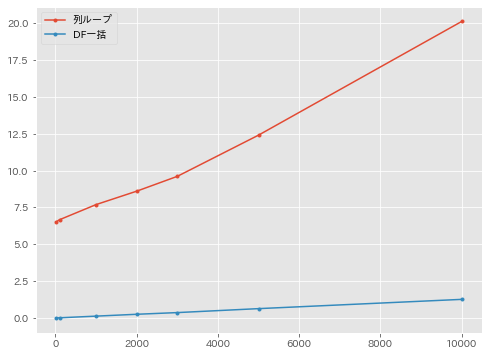

In [6]:
#x = np.arange(len(elt))
x = n_data_list

plt.figure(figsize=(8, 6))
#fig, ax = plt.subplot()
plt.plot(x, elt['pattern_A'].values, marker='.', label='列ループ')
plt.plot(x, elt['pattern_B'].values, marker='.', label='DF一括')
#ax.set_xticklabel(n_data)
plt.legend()
plt.show()